<a href="https://colab.research.google.com/github/Ayafarhatt/Ayafarhatt/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **`Breast cancer classification`**


In [ ]:
import pandas
import tensorflow

In [ ]:
from pandas import read_csv
#load data from the URL
URL="https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv"
data= read_csv(URL,header=None)
print(data.shape)

(306, 4)


In [ ]:
data

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
[[<Axes: title={'center': '0'}> <Axes: title={'center': '1'}>]
 [<Axes: title={'center': '2'}> <Axes: title={'center': '3'}>]]


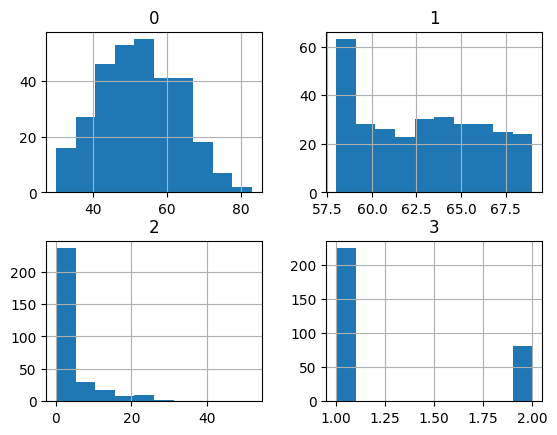

In [ ]:
print(data.describe())
print(data.hist())

In [ ]:
from collections import Counter

columns=['age','year','nodes','class']
data_names= read_csv(URL,header=None,names=columns)
#calculate the targets(class)
targets=data_names['class'].values
Counter=Counter(targets);
for key,value in Counter.items():
    percentage=value/len(targets)*100
    print('class=%d,count=%d,percentage=%.3f %%'%(key,value,percentage))

class=1,count=225,percentage=73.529 %
class=2,count=81,percentage=26.471 %


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'data' is your input data and 'data_names' is your output data
# Preparing the input (X) and output (Y)
X, Y = data.values[:, :-1], data_names.values[:, -1]

# Preprocessing
X = X.astype('float32')
Y = LabelEncoder().fit_transform(Y)

# Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, stratify=Y, random_state=3)

In [ ]:
!pip install tensorflow

from collections import Counter # import Counter
import tensorflow as tf

# Assuming 'data' is your input data and 'data_names' is your output data
# Preparing the input (X) and output (Y)
# ... (rest of your code)

n_features = X.shape[1]
model = tf.keras.models.Sequential() # Use tf.keras.models.Sequential
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(n_features,))) # Use tf.keras.layers.Dense
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Use tf.keras.layers.Dense
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 0s 27ms/step - loss: 0.5074 - accuracy: 0.7623 - val_loss: 0.5695 - val_accuracy: 0.7097
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.5060 - accuracy: 0.7623 - val_loss: 0.5759 - val_accuracy: 0.7097
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.5076 - accuracy: 0.7623 - val_loss: 0.5775 - val_accuracy: 0.7097
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.5062 - accuracy: 0.7623 - val_loss: 0.5681 - val_accuracy: 0.7097
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 0.5062 - accuracy: 0.7623 - val_loss: 0.5648 - val_accuracy: 0.7097
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 0.5073 - accuracy: 0.7623 - val_loss: 0.5691 - val_accuracy: 0.7097
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 0.5116 - accuracy: 0.7623 - val_loss: 0.5622 - val_accuracy: 0.7097
Epoch 8/200
4/4 [===

In [ ]:
from sklearn.metrics import accuracy_score
#predict
Y_predict=(model.predict(X_test)>0.5).astype(int)
score=accuracy_score(Y_test,Y_predict)
print('Accuracy: %.3f  %% ' % score)

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.765  % 


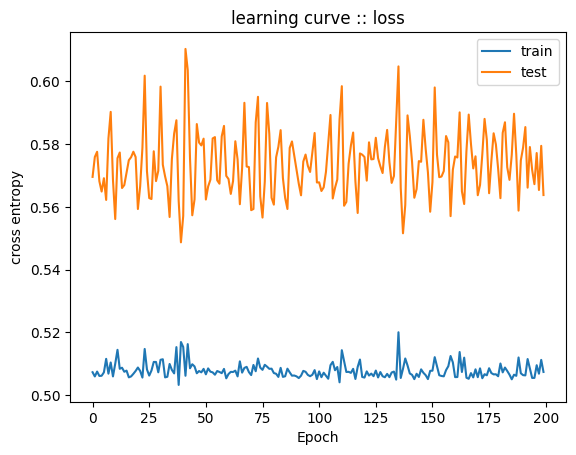

In [ ]:
from matplotlib import pyplot
pyplot.title('learning curve :: loss')
pyplot.xlabel("Epoch")
pyplot.ylabel('cross entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
history.history['accuracy']

{'loss': [0.5249522924423218,
  0.5226224064826965,
  0.5247511267662048,
  0.5240520238876343,
  0.5232974290847778,
  0.5264912247657776,
  0.5252034664154053,
  0.5234031081199646,
  0.523247241973877,
  0.522432267665863,
  0.5236859321594238,
  0.5227829217910767,
  0.5242616534233093,
  0.5229528546333313,
  0.5230008363723755,
  0.5233043432235718,
  0.5228323936462402,
  0.5221284627914429,
  0.5242673754692078,
  0.5227136015892029,
  0.5251020789146423,
  0.5237911939620972,
  0.5228652954101562,
  0.5234937071800232,
  0.5248916745185852,
  0.5231720805168152,
  0.5243569016456604,
  0.5229398608207703,
  0.5239201188087463,
  0.525550127029419,
  0.5229011178016663,
  0.5233138799667358,
  0.5230082869529724,
  0.5224043130874634,
  0.5223554968833923,
  0.5222653150558472,
  0.5271548628807068,
  0.5222535133361816,
  0.5258592963218689,
  0.5288248658180237,
  0.5245074033737183,
  0.5223566889762878,
  0.5250083804130554,
  0.5255848169326782,
  0.5222214460372925,
  0.5

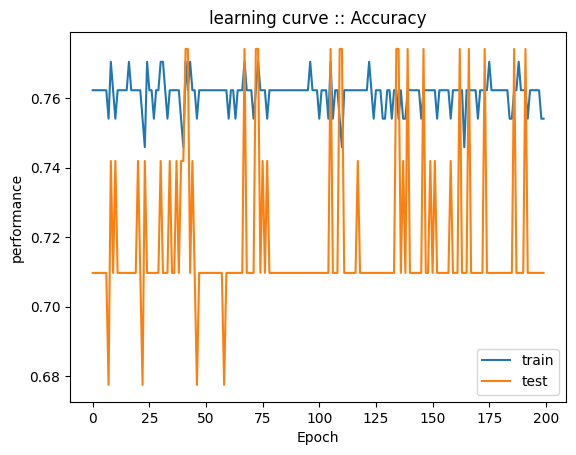

In [ ]:
from matplotlib import pyplot
pyplot.title('learning curve :: Accuracy')
pyplot.xlabel("Epoch")
pyplot.ylabel('performance')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()